# Pandas: Exploring Data by Filtering & grouping by
This session has an accompanying powerpoint presentation.


## Session agenda

1. Last session recap - Pandas & explore data
2. Filtering - Practice in break out rooms \
(Break)
3. Group by  - Practice in break out rooms \

### Functions used in session #2:
- `df.head()`, `df.describe()`, `df.columns`, `df.index`
- `df[]`, `df.loc[]`, `df.iloc[]`, `df.query()`
- `df.groupby()`
- `df.nunique()`, `df.count()`, `df.agg()`, `df.mean()`, `df.sum()`
- `df.reset_index()`, `df.sort_values()`

## 1. Last session recap - Pandas

The dataset contains the information of 10.000 cars. There are 9 different columns:
- **Make**   - Car brand, example: Ford
- **Model**  - The Model of the Car, example: Focus
- **Year**   - The Year in which the car was build, example: 2012
- **Variant** - The car model version showing the PS, example: 1.6 Trendline
- **Kms**    - The kilometers the cars has been driven, example: 90000
- **Price**  - The offered price for the car, example: 10000
- **Doors**  - How many doors the car has, example: 4
- **Kind**  - Type of car, example: Pick-Up
- **Location**  - Where the car is located, example: Buenos Aires


In [ ]:
import pandas as pd

In [ ]:
# Reading data
cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")

In [ ]:
#Get a quick overlook of the dataset

cars.head(7)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba
5,Volkswagen,Amarok,2014,2.0 Cd Tdi 180cv 4x4 Highline C34,115000,790000,4.0,Pick-Up,Buenos Aires Interior
6,Ford,Ka,2012,1.0 Fly Viral 63cv,95243,142000,3.0,Hatchback,Bs.as. G.b.a. Sur


In [ ]:
# How many rows and columns are there in the dataframe

cars.shape

(10000, 9)

In [ ]:
#Get descriptive statistics information of the dataset (e.g: mean, min, max, etc)

cars.describe()#(include="all")  # include="all" to show non-numeric columns


#With this apply function you can supress scientific notation in the describe function   ### CHAT GPT check
#cars["Price"].describe().apply(lambda x: format(x, 'f')).to_frame()

,Year,Kms,Price,Doors
count,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,2013.293800,74483.338400,3.495455e+05,4.295800
std,1.816043,35150.279998,1.773396e+05,0.889821
min,2011.000000,5094.000000,6.300000e+03,2.000000
25%,2012.000000,49500.000000,2.290000e+05,4.000000
50%,2013.000000,73000.000000,3.000000e+05,5.000000
75%,2015.000000,97000.000000,4.300000e+05,5.000000
max,2018.000000,218000.000000,2.800000e+06,5.000000


In [ ]:
#What's the year of the oldest car in the dataset?
#What's the mean Kms of the cars in the dataset?
#What is the minimum price for a car in this dataset?
#Why are we only seeing 4 columns out of 9 with .describe(). Is there a way to see all of them?

In [ ]:
# Compute number of unique values in each column - typical aggregation

cars.nunique()

Make           5
Model         62
Year           8
Variant      592
Kms         1201
Price        948
Doors          4
Kind          10
Location      28
dtype: int64

In [ ]:
#What unique values does the "Make" variable have?

cars.Make.unique()

array(['Volkswagen', 'Ford', 'Mercedes Benz', 'Honda', 'Chrysler'],
      dtype=object)

In [ ]:
# What are the indexes and columns in the dataframe?
print("Index:", cars.index)
cars.columns

Index: RangeIndex(start=0, stop=10000, step=1)


Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location'],
      dtype='object')

In [ ]:
# When selecting with square brackets only, what object type filters the rows,
# what object type filters the columns?

#cars["Make"]            # label-based filtering
#cars[cars.Year > 2015]  # conditional filtering (with booleans)
#cars[4:6]               # integer filtering

In [ ]:
#select a new df with only Volkswagen cars

cars[cars["Make"] == 'Volkswagen']

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba
5,Volkswagen,Amarok,2014,2.0 Cd Tdi 180cv 4x4 Highline C34,115000,790000,4.0,Pick-Up,Buenos Aires Interior
10,Volkswagen,Amarok,2014,2.0 Cd Tdi 4x4 Highline Pack At C34,79900,685000,4.0,Pick-Up,Bs.as. G.b.a. Norte
...,...,...,...,...,...,...,...,...,...
9985,Volkswagen,Gol Trend,2016,1.6 Trendline 101cv,54100,270000,5.0,Hatchback,Buenos Aires Interior
9986,Volkswagen,Gol,2013,1.4 Power 83cv 5 p,77000,140000,5.0,Hatchback,Bs.as. G.b.a. Norte
9987,Volkswagen,Suran,2013,1.6 Comfortline 101cv,88739,240000,5.0,Monovolumen,Bs.as. G.b.a. Sur
9992,Volkswagen,Suran,2011,1.6 Imotion Trendline 11b,80000,190000,5.0,Monovolumen,Bs.as. G.b.a. Norte


## 2. Filtering

Question: How many Fords were produced in or after 2016 in our dataset?

---
Three methods can be used:

1. Filtering with booleans
2. .loc
3. .query

### 1) Filtering with booleans


In [ ]:
#With the boolean method, select in a new DataFrame all cars that are from the year 2016. How many records meet this codition?

cars_2016 = cars[cars['Year'] == 2016]

len(cars_2016 )

NameError: name 'cars' is not defined

In [ ]:
#With the boolean method, select in a new DataFrame all cars that are from the Make "Ford" and Year 2016. How many records meet this codition?

ford_2016 = cars[(cars["Make"] == "Ford") & (cars["Year"] == 2016)]
len(ford_2016)

In [ ]:
#The following code is aiming to select cars that are from Make Volkswagen or Year 2013 or older. Correct this code (keeping the boolean method)and note down the mistakes

cars[cars["Make"] == "Volkswagen" & cars["Year"] < "2013"]

#Correct code:

#cars[(cars["Make"] == "Volkswagen") & (cars["Year"] <= "2013")]
#Each condition we're filtering with must be in between parenthesis ()
#when filtering for year we need to include the year 2013 so the symbol should be <=
#years is an int variable so the quotes " " should not be included.

**REMEMBER:** You can then count the number of rows with `df.shape` or `len(df)`.

In [ ]:
#With the boolean method, in a new dataframe, select all cars that are not Mercedez Benz or Chrysler

some_cars = cars[(cars["Make"] != "Mercedes Benz") & (cars["Make"] != "Chrysler")]
some_cars

In [ ]:
#In a new DataFrame select only the following columns: Make, Year, Kms, Price and Doors

new_cars = cars[['Make', 'Year', 'Kms', 'Price', 'Doors']]
new_cars

### 2) Filtering with `.loc[]`

In [ ]:
#with the .loc[] method select all Mercedes Benz from 2018. How many records are there?

cars.loc[(cars["Year"] == 2018)& (cars["Make"] == "Mercedes Benz")]

In [ ]:
#In a new DataFrame, with the .loc[], method select all Hondas. How many records are there?

cars.loc[cars["Make"] == "Honda"]

In [ ]:
#In a new DataFrame, with the .loc[], method select all Hondas that are $200.000 or lower. How many records are there?

honda_cheap = cars.loc[(cars["Make"] == "Honda")& (cars["Price"] <= 200000)]
len(honda_cheap)

In [ ]:
#The following code is aiming to select cars that are from the Locations "Capital Federal" and have less than 50.000 Kms.
#Correct this code (keeping the .loc[] method)and note down the mistakes.
# Once corrected: How many cars are there? Whats the average price of this selection of cars?

cars[cars["Location"] == "Capital federal" & car["kms"] > 50.000]

#Correct code:

#cars[(cars["Location"] == "Capital Federal") & (cars["Kms"] < 50000)]
#Each condition we're filtering with must be in between parenthesis ()
#the location name has to match excatly how it is in the data set. in this case the R in Rioja is capitalized
#the dataframe in the second condition is cars not car
#'kms' should be "Kms" matching exactly the column case
#For cars with less than 50.000 the operator should be <
#Numbers should not inlcude separators

### 3) Filtering with `.query()`
You can filter a dataframe by using the .query() method. It takes 1 argument: a string that represents a condition. There is no need to repeat the name of the dataframe before the column name, like we did when using booleans. Example:

In [ ]:
#With the .query() method select all cars that have a price over or equal to 300.000. How many are there? Whats the highest price in this subset of data?


over_300k = cars.query('Price >= 300000')

print(len(over_300k))
print(over_300k.Price.describe().apply(lambda x: format(x, 'f')).to_frame())

In [ ]:
#With the .query() method select all cars that are Make Ford, Model Ecosport with less than 10.000 Kms and is from Buenos Aires Interior (Location).
#How many are there?

cars.query('Make == "Ford" & Model == "Ecosport" & Kms < 20000 & Location == "Buenos Aires Interior"')

In [ ]:
cars.query('Kind == "SUV"')

NameError: name 'cars' is not defined

In [ ]:
cars.Kind.unique()

In [ ]:
#The following code aims to select cars that are from SUV or Hatchback. Correct this code (keeping the query method)and note down the mistakes.
#How many records are there?
#Whats the average Kms from this seleciton of cars?

#cars.query('Model == Hatchback | "Model" = "SUV"')

#Correct code:

cars.query('Kind == "Hatchback" | Kind == "SUV"')
#Hatchback has to be in quotes,
#We are filtering according to Kind not Model, this needs to be corrected in both conditions and should not be in quotes.
#In the second condition its == instead of =

You can combine several conditions. This time, no need to use parentheses.

In [ ]:
print(cars.query('Year >= 2016 & Make == "Ford"').shape)  # `Make in ["Ford"]` also works

### 5) **Bonus Questions on Filtering!**

In [ ]:
#With the boolean method and in a new DataFrame select all Ford cars that have over 100.000 Kms and at least 4 doors.

In [ ]:
#With the .loc[] method calculate the average Kms for Chrysler (Make) cars in 2012 and in 2018

In [ ]:
#With the query method calculate whats the total kilometers of Volkswagen Vento from 2011?

In [ ]:
#Whith the method of your choice:
#You are a data analyst from a car sales shop and are asked by a sales person to send the details of all cars from "La Rioja"
# that are not of Kind Pick Up that are $350.000 or less from 2015 or older with less than 200.000 Kms. Write the code fro the selection:


cars.query('Location == "La Rioja" & Kind != "Pick-Up" & Price <= 350000 & Year <= 2015 & Kms < 200000')


## 3. Group by

The `.groupby()` method is a crucial part of the pandas library. In addition to filtering, grouping data during exploration is quite useful \
 \


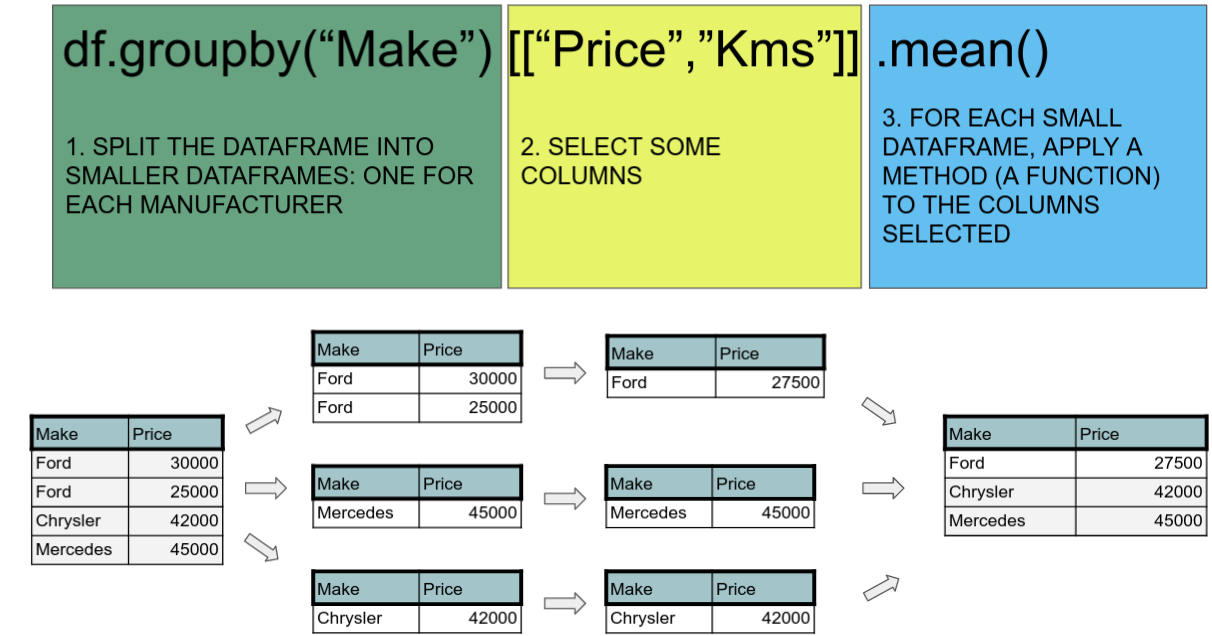

In [ ]:
# Explore how expensive the car makes are in general using the **.groupby()** method
# Which Make is on average the cheapest?
# Which Make has on average the most kms?

In [ ]:
cars.groupby("Make")[["Price", "Kms"]].mean()

NameError: name 'cars' is not defined

In [ ]:
#Whats the average price form a car by Make?

cheap = cars.groupby("Make")["Price"].mean().reset_index()
cheap

,Make,Price
0,Chrysler,366845.833333
1,Ford,353041.877764
2,Honda,381520.603448
3,Mercedes Benz,512749.515625
4,Volkswagen,335441.534119


In [ ]:
cheap.loc[cheap["Price"] == cheap["Price"].min()]

,Make,Price
4,Volkswagen,335441.534119


In [ ]:
#Whats the average price form a car by # of doors?

cars.groupby("Doors")["Price"].mean().to_frame().min()

,0
Price,198505.448598


In [ ]:
#Whats the average price form a car by Year and Make?

cars.groupby(["Make", "Year"])["Price"].mean().to_frame()

Price
Make          Year               
Chrysler      2011  194268.750000
              2012  845000.000000
              2013  788400.000000
              2016   64000.000000
Ford          2011  238353.903759
              2012  258252.164204
              2013  325814.703440
              2014  368681.225146
              2015  430700.396290
              2016  495459.397531
              2017  520511.413043
              2018  631723.809524
Honda         2011  303601.478528
              2012  329543.642276
              2013  390736.644444
              2014  394970.547945
              2015  467133.333333
              2016  658687.437500
              2017  665715.000000
              2018  777666.666667
Mercedes Benz 2011  428608.840909
              2012  534378.750000
              2013  502578.955882
              2014  593810.731707
              2015  683785.642857
              2016  343776.142857
              2017  493533.333333
              2018  807600.000000
Volkswagen    2011  259260.629893
              2012  284522.686312
              2013  322123.462604
              2014  351587.337641
              2015  429867.192118
              2016  441814.716146
              2017  465933.547244
              2018  588059.958333

You can make the output more readable with the method `.round()`, that takes 1 argument (the number of decimals).

In [ ]:
make_means = cars.groupby(["Make"])[["Price", "Kms"]].mean().round(1)
# make_means = cars.groupby(["Make"])[["Price", "Kms"]].mean().round(-2)
make_means #.loc[["Ford"], ["Price"]]

,Price,Kms
Make,,
Chrysler,366845.8,79594.0
Ford,353041.9,69897.5
Honda,381520.6,81619.7
Mercedes Benz,512749.5,67358.7
Volkswagen,335441.5,77660.2


You can sort the output with the method `.sort_values()` that take at least 1 argument, the name of the column you want to sort the dataframe on, and an optional argument `ascending`, that you need to set to `False`, if you want the highest value at the top.

In [ ]:
avg_price_and_kms_by_make = cars.groupby("Make")[["Price", "Kms"]].mean().sort_values("Price", ascending=False)

avg_price_and_kms_by_make

,Price,Kms
Make,,
Mercedes Benz,512749.515625,67358.714844
Honda,381520.603448,81619.659004
Chrysler,366845.833333,79593.958333
Ford,353041.877764,69897.515776
Volkswagen,335441.534119,77660.223275


Pay attention to the fact that the column `"Make"`, that we used in the `.groupby()` method, is not a column in the output. It is now part of the index.

For example, we cannot get the column `"Make"` to create a boolean the same way as before. The following code returns an error:

In [ ]:
avg_price_and_kms_by_make.index == 'Ford'

array([False, False, False,  True, False])

In [ ]:
# avg_price_and_kms_by_make["Make"] == 'Ford'  # raises KeyError

In [ ]:
avg_price_and_kms_by_make.columns

Index(['Price', 'Kms'], dtype='object')

The `KeyError` means, that python cannot find what you are looking for in the place where you are looking for it: `"Make"` is nowhere to be found among the columns of the dataframe `cars_price_avg`. It is being used as index for the rows now.

We can make sure, that the columns in the index go back to being normal columns using `.reset_index()`:

In [ ]:
avg_price_and_kms_by_make.reset_index()

,Make,Price,Kms
0,Mercedes Benz,512749.515625,67358.714844
1,Honda,381520.603448,81619.659004
2,Chrysler,366845.833333,79593.958333
3,Ford,353041.877764,69897.515776
4,Volkswagen,335441.534119,77660.223275


In [ ]:
avg_price_and_kms_by_make

,Price,Kms
Make,,
Mercedes Benz,512749.515625,67358.714844
Honda,381520.603448,81619.659004
Chrysler,366845.833333,79593.958333
Ford,353041.877764,69897.515776
Volkswagen,335441.534119,77660.223275


In [ ]:
avg_price_and_kms_by_make.reset_index(inplace=True)
# avg_price_and_kms_by_make = avg_price_and_kms_by_make.reset_index()  # same
avg_price_and_kms_by_make.columns

Index(['Make', 'Price', 'Kms'], dtype='object')

In [ ]:
avg_price_and_kms_by_make

,Make,Price,Kms
0,Mercedes Benz,512749.515625,67358.714844
1,Honda,381520.603448,81619.659004
2,Chrysler,366845.833333,79593.958333
3,Ford,353041.877764,69897.515776
4,Volkswagen,335441.534119,77660.223275


### Conclusion:
- The most expensive car make on average is Mercedes Benz.
- Volkswagen is the cheapest car make on average.
- The most used cars (with the highest average km) are from Honda.

`.groupby()` can take not only a column name `str`, but also a list of column names: `df.groupby(["A", "B", "C"])`.

<font color='orange'>**Your turn!**</font> Calculate the average price by make and number of doors

### **Bonus Questions on Groupby!**

Calculate the average price of cars from location Córdoba and Salta from 2015-2017

In [ ]:
#your code

What is the cheapest Chrysler car each year?

In [ ]:
#your code

## 4. More with .groupby() - Theory


#### Question:

* How many unique models does each brand have?
* Which kind of cars is the most expensive and which one is the most popular (the most frequent in our data)?


The method `.nunique()` gives you the number of unique values in each column. Thanks to `.groupby()`, you can get this value for each make.

In [ ]:
cars.groupby("Make")[["Model"]].nunique()

,Model
Make,
Chrysler,2
Ford,11
Honda,6
Mercedes Benz,15
Volkswagen,28


You can verify, that Chrysler has indeed only 2 models:

In [ ]:
cars.loc[cars["Make"] == "Chrysler", "Model"].unique()

array(['Town & Country', 'PT Cruiser'], dtype=object)

The `.agg()` method (alias for `.aggregate()`) allows you to apply multiple functions to the selected columns:

In [ ]:
cars.groupby("Make")[["Price"]].agg(["mean", "sum", "count"])

Price                  
                        mean         sum count
Make                                          
Chrysler       366845.833333     8804300    24
Ford           353041.877764  1420993558  4025
Honda          381520.603448   199153755   522
Mercedes Benz  512749.515625   131263876   256
Volkswagen     335441.534119  1735239056  5173

In [ ]:
cars.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location'],
      dtype='object')

In [ ]:
df = cars.groupby(["Make", "Doors"])[["Price", "Kms"]].agg(["mean", "sum", "count"])
df

Price                            Kms             \
                              mean        sum count          mean        sum   
Make          Doors                                                            
Chrysler      5.0    366845.833333    8804300    24  79593.958333    1910255   
Ford          2.0    481503.905138  121820488   253  93473.272727   23648738   
              3.0    158703.575931   55387548   349  73466.601719   25639844   
              4.0    455984.895161  395794889   868  72529.835253   62955897   
              5.0    331894.572603  847990633  2555  66181.221918  169093022   
Honda         3.0     26000.000000      26000     1   7500.000000       7500   
              4.0    323781.196653   77383706   239  84958.874477   20305171   
              5.0    431716.485816  121744049   282  79052.450355   22292791   
Mercedes Benz 2.0    574315.371795   44796599    78  64500.435897    5031034   
              4.0    497913.053333   37343479    75  78077.946667    5855846   
              5.0    476930.077670   49123798   103  61717.970874    6356951   
Volkswagen    2.0    379124.705056  134968395   356  69958.283708   24905149   
              3.0    226298.648221  114507116   506  59223.490119   29967086   
              4.0    422831.048874  882448399  2087  88880.303785  185493194   
              5.0    271274.795863  603315146  2224  72558.860612  161370906   

                           
                    count  
Make          Doors        
Chrysler      5.0      24  
Ford          2.0     253  
              3.0     349  
              4.0     868  
              5.0    2555  
Honda         3.0       1  
              4.0     239  
              5.0     282  
Mercedes Benz 2.0      78  
              4.0      75  
              5.0     103  
Volkswagen    2.0     356  
              3.0     506  
              4.0    2087  
              5.0    2224

In [ ]:
df = cars.groupby(["Make", "Doors"])[["Price", "Kms"]].agg("mean") # same as .mean()
df

NameError: name 'cars' is not defined

In [ ]:
my_functions = ["mean", "count"]
my_columns = ["Price", "Doors"]

price_by_kind = cars.groupby("Kind")[my_columns].agg(my_functions)
price_by_kind

NameError: name 'cars' is not defined

In [ ]:
price_by_kind

Price           Doors      
                      mean count      mean count
Kind                                            
Cabriolet     79272.636364    11  2.000000    11
Coupé        543092.155556    90  2.022222    90
Furgón       702054.698113    53  2.000000    53
Hatchback    276554.828649  4056  4.564103  4056
Minivan      650000.000000     1  2.000000     1
Monovolumen  270500.202837   705  4.991489   705
Pick-Up      545194.551390  1547  3.313510  1547
Rural        330247.118644    59  4.610169    59
SUV          380707.993103  1305  5.000000  1305
Sedán        338569.647032  2173  4.000000  2173

In [ ]:
price_by_kind[("Price", "mean")].sort_values(ascending=False)[:2]

NameError: name 'price_by_kind' is not defined

In [ ]:
price_by_kind[("Price", "count")].sort_values(ascending=False)[:2]

Kind
Hatchback    4056
Sedán        2173
Name: (Price, count), dtype: int64

### Conclusion

- There are x different models made by Volkswagen.
- The most popular kind is x.
- The most expensive kind is x.

## Recap of functions
- `df.head()`, `df.describe()`, `df.columns`, `df.index`
- `df[]`, `df.loc[]`, `df.iloc[]`, `df.query()`
- `df.groupby()`
- `df.nunique()`, `df.count()`, `df.agg()`, `df.mean()`, `df.sum()`
- `df.reset_index()`, `df.sort_values()`, `df.round()`

There is a much deeper guide about "group by": [link](https://pandas.pydata.org/docs/user_guide/groupby.html). I suggest not to learn it, but look there for comprehensive reference.

## 5. **EXTRA MATERIAL**

### 1.**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

In [ ]:
cars.groupby("Kind").agg({"Price": ["mean", "count"], "Kms": "max"})

Price           Kms
                      mean count     max
Kind                                    
Cabriolet     79272.636364    11   82000
Coupé        543092.155556    90  150000
Furgón       702054.698113    53  169000
Hatchback    276554.828649  4056  159000
Minivan      650000.000000     1  170000
Monovolumen  270500.202837   705  156000
Pick-Up      545194.551390  1547  218000
Rural        330247.118644    59  149000
SUV          380707.993103  1305  165000
Sedán        338569.647032  2173  159000

### 2. **Pivot table with Pandas**

1. How to turn a long dataframe into a wide one.

In [ ]:
cars_produced_by_year_and_make = cars.groupby(["Year", "Make"])[["Model"]].count()
cars_produced_by_year_and_make.reset_index(inplace=True)
cars_produced_by_year_and_make.rename(columns={"Model": "Cars_Produced"}, inplace=True)
cars_produced_by_year_and_make.head(10)

,Year,Make,Cars_Produced
0,2011,Chrysler,16
1,2011,Ford,665
2,2011,Honda,163
3,2011,Mercedes Benz,44
4,2011,Volkswagen,1124
5,2012,Chrysler,2
6,2012,Ford,609
7,2012,Honda,123
8,2012,Mercedes Benz,48
9,2012,Volkswagen,1052


In [ ]:
cars_produced_by_year_and_make_wide =  pd.pivot_table(
    cars_produced_by_year_and_make,
    values="Cars_Produced",
    index=["Year"],
    columns=["Make"],
)
cars_produced_by_year_and_make_wide

Make,Chrysler,Ford,Honda,Mercedes Benz,Volkswagen
Year,,,,,
2011,16.0,665.0,163.0,44.0,1124.0
2012,2.0,609.0,123.0,48.0,1052.0
2013,5.0,843.0,90.0,68.0,1083.0
2014,NaN,684.0,73.0,41.0,619.0
2015,NaN,593.0,18.0,14.0,609.0
2016,1.0,405.0,32.0,21.0,384.0
2017,NaN,184.0,20.0,15.0,254.0
2018,NaN,42.0,3.0,5.0,48.0


2. How to turn a wide dataframe into a long one

In [ ]:
cars_produced_by_year_and_make_wide.reset_index().melt(id_vars="Year").head(10)

,Year,Make,value
0,2011,Chrysler,16.0
1,2012,Chrysler,2.0
2,2013,Chrysler,5.0
3,2014,Chrysler,NaN
4,2015,Chrysler,NaN
5,2016,Chrysler,1.0
6,2017,Chrysler,NaN
7,2018,Chrysler,NaN
8,2011,Ford,665.0
9,2012,Ford,609.0


### 3. **Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

### 4. **Sorting Data**

Let's say, we would like to see the least used cars (in terms of kms).

We can use the `sort_values()` for this purpose. (`sort_values()` sorts ascending by deafult.)



In [ ]:
cars.sort_values("Kms").head(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
5665,Volkswagen,Saveiro,2017,1.6 Gp Cs 101cv Safety,5094,320000,2.0,Pick-Up,Bs.as. G.b.a. Sur
8673,Ford,Ecosport,2017,1.6 S 110cv 4x2,5100,390000,5.0,SUV,Bs.as. G.b.a. Sur
8828,Volkswagen,Gol Trend,2017,1.6 Trendline 101cv 3p,5500,330000,3.0,Hatchback,Bs.as. G.b.a. Sur
2461,Ford,Focus III,2017,2.0 Se,5500,480000,5.0,Hatchback,Capital Federal
7910,Volkswagen,Saveiro,2017,1.6 Gp Cs 101cv Safety,5600,360000,2.0,Pick-Up,Bs.as. Costa Atlántica


We can modify the order of sort_values if we would like to see the most used cars.

In [ ]:
cars.sort_values("Kms", ascending=False).head(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
5204,Ford,Ranger,2011,3.0 Cd Xl 4x2,218000,300000,2.0,Pick-Up,Bs.as. G.b.a. Sur
5793,Ford,Ranger,2011,3.0 Cd Superduty 4x4,215000,385000,2.0,Pick-Up,Bs.as. G.b.a. Sur
7369,Ford,Ranger,2011,3.0 Cd Xl Plus 4x2,215000,310000,2.0,Pick-Up,Córdoba
4029,Volkswagen,Amarok,2011,2.0 Cd Tdi 4x2 Trendline Ll17 1t8,214000,400000,4.0,Pick-Up,Chubut
2049,Volkswagen,Amarok,2011,2.0 Cd Tdi 4x4 Highline Pack 1hp,209898,550000,4.0,Pick-Up,Bs.as. G.b.a. Norte


**NOTE**: Using the `sort_values()` method does not overwrite the object. It remains unaltered after applying it the `sort_values()` function

If you want to overwrite the object with the new values ordered there are 2 ways to do it:


1.   Assign to `cars` the value `cars.sort_values()`




In [ ]:
sorted_cars = cars.sort_values("Kms")
sorted_cars.head(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
5665,Volkswagen,Saveiro,2017,1.6 Gp Cs 101cv Safety,5094,320000,2.0,Pick-Up,Bs.as. G.b.a. Sur
8673,Ford,Ecosport,2017,1.6 S 110cv 4x2,5100,390000,5.0,SUV,Bs.as. G.b.a. Sur
8828,Volkswagen,Gol Trend,2017,1.6 Trendline 101cv 3p,5500,330000,3.0,Hatchback,Bs.as. G.b.a. Sur
2461,Ford,Focus III,2017,2.0 Se,5500,480000,5.0,Hatchback,Capital Federal
7910,Volkswagen,Saveiro,2017,1.6 Gp Cs 101cv Safety,5600,360000,2.0,Pick-Up,Bs.as. Costa Atlántica


2.   Use the `inplace` `parameter` of `.sort_values()`

In [ ]:
cars.sort_values("Kms", ascending=False, inplace=True)
cars.head(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
5204,Ford,Ranger,2011,3.0 Cd Xl 4x2,218000,300000,2.0,Pick-Up,Bs.as. G.b.a. Sur
5793,Ford,Ranger,2011,3.0 Cd Superduty 4x4,215000,385000,2.0,Pick-Up,Bs.as. G.b.a. Sur
7369,Ford,Ranger,2011,3.0 Cd Xl Plus 4x2,215000,310000,2.0,Pick-Up,Córdoba
4029,Volkswagen,Amarok,2011,2.0 Cd Tdi 4x2 Trendline Ll17 1t8,214000,400000,4.0,Pick-Up,Chubut
2049,Volkswagen,Amarok,2011,2.0 Cd Tdi 4x4 Highline Pack 1hp,209898,550000,4.0,Pick-Up,Bs.as. G.b.a. Norte


Another way to sort data in Pandas is using sort_index(). As its name suggests, this statement is used for sorting indexes.

In [ ]:
cars.sort_index()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba
...,...,...,...,...,...,...,...,...,...
9995,Ford,Focus III,2016,2.0 Se,67000,399000,5.0,Hatchback,Bs.as. G.b.a. Oeste
9996,Volkswagen,Bora,2012,1.9 Trendline I 100cv,120000,240000,4.0,Sedán,Buenos Aires Interior
9997,Ford,Fiesta Kinetic Design,2012,1.6 Design 120cv Titanium,89000,250000,5.0,Hatchback,Tucumán
9998,Ford,Fiesta Kinetic Design,2013,1.6 Design 120cv Titanium,76000,295000,5.0,Hatchback,Buenos Aires Interior


### 5. **Summary of the possible ways to index a df:**

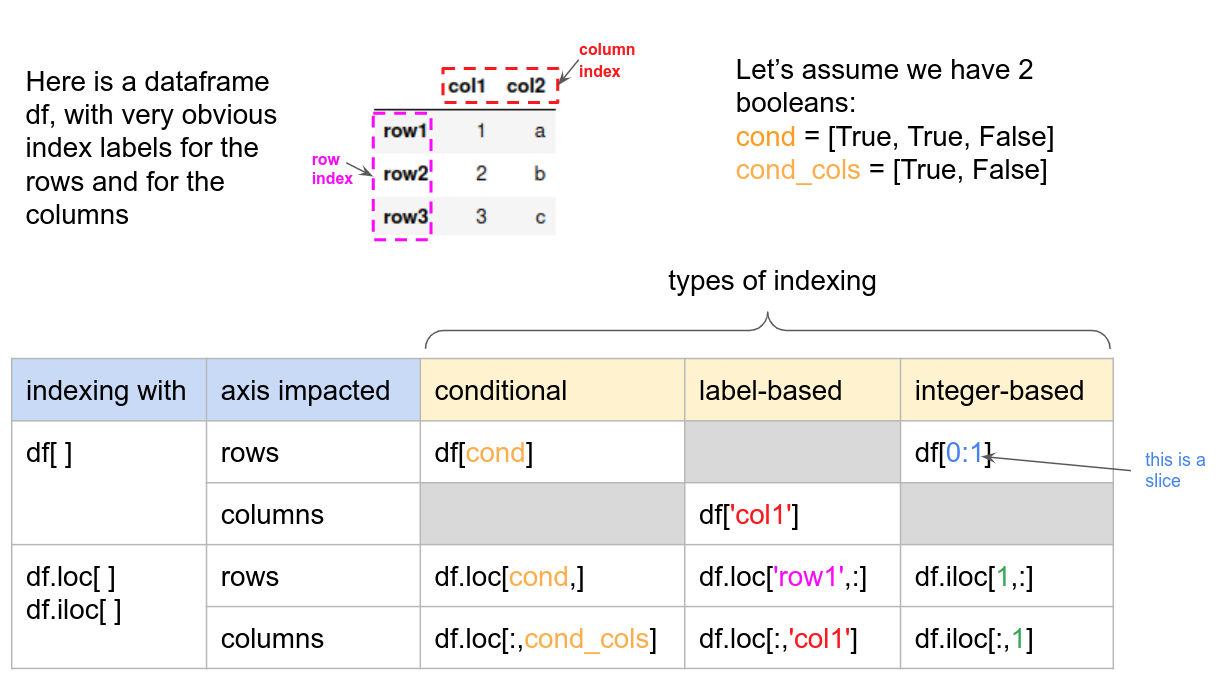

You can omit the comma and the colon when filtering rows with `.iloc[]` if you are not also selecting specific columns. I left them in the table to keep the same structure for both rows and columns filtering, but they can safely be removed.